<a href="https://colab.research.google.com/github/Lzan08/Kuliah/blob/main/SelektaPerkapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Menginstall library
! pip install dtreeviz
! pip install graphviz
! pip install mglearn

In [32]:
# Mengimport library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
from sklearn.tree import export_graphviz
import graphviz

In [33]:
# memasukan data untuk dataset
dataset=pd.read_excel('/content/Datacar.xlsx')

In [34]:
# menginisiasi x sebagai input dan y sebagai output
# variabel x, yang akan berisi semua fitur (kolom) dari dataset kecuali kolom terakhir.
# Variabel y ini berisi label atau target yang ingin diprediksi dalam tugas pembelajaran mesin.
# [baris,colom]
x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [35]:
# mengimport untuk train data dan test data pada decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [36]:
# membagi subset yaitu set train dan set test dengan rasio set test sebesar 30% dan set train 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [37]:
# membuat sebuah objek model Decision Tree Classifier dengan beberapa parameter konfigurasi.
# Mengontrol kedalaman maksimum 4
dt=DecisionTreeClassifier(max_depth = 4, random_state = 0 )

In [38]:
# melatih dataset x_train dan y_train
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [39]:
# membuat prediksi dengan model Decision Tree Classifier yang telah dilatih sebelumnya.
y_pred=dt.predict(x_test)

In [40]:
# mengimpor beberapa metrik evaluasi kinerja model yang umum digunakan dalam machine learning
# accuracy_score adalah metrik yang digunakan untuk mengukur sejauh mana model klasifikasi benar-benar memprediksi label yang benar pada data pengujian.
# classification_report adalah metrik yang memberikan laporan lengkap tentang kinerja model klasifikasi
# confusion_matrix mengevaluasi performa model klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya dari data pengujian.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
# melihat akurasi
print ('akurasi :', accuracy_score(y_test,y_pred))

akurasi : 0.8362235067437379


In [42]:
# melihat klasifikasi report
print ('report :', classification_report(y_test,y_pred))

report :               precision    recall  f1-score   support

           1       1.00      0.86      0.93       367
           2       0.66      0.84      0.74       115
           3       0.36      1.00      0.53        20
           4       0.00      0.00      0.00        17

    accuracy                           0.84       519
   macro avg       0.51      0.68      0.55       519
weighted avg       0.87      0.84      0.84       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Membuat file untuk melakukan visualisasi decision tree
export_graphviz(dt, out_file="tree.dot",
               feature_names = x.columns, impurity = False, filled = True)

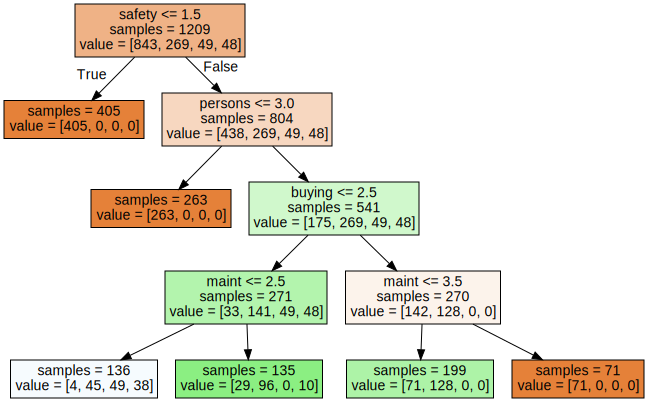

In [44]:
# Menampilkan decision tree
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [45]:
# Menampilkan feature penting
print("Feature Importance:\n{}".format(dt.feature_importances_))


Feature Importance:
[0.09898543 0.21386211 0.         0.40682033 0.         0.28033213]


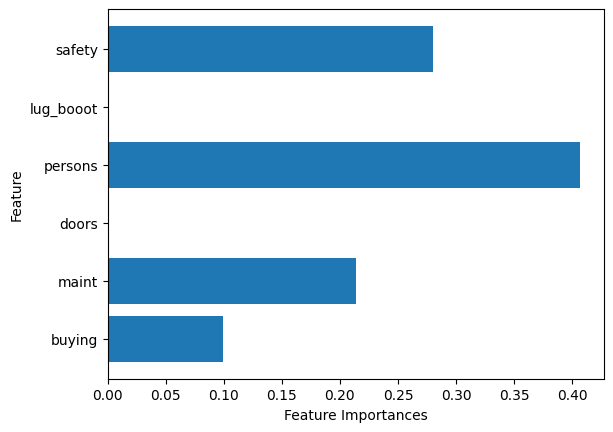

In [46]:
# Menampilkan grafik feature importance
def plot_feature_importance_car_model(model):
    n_features = dataset.drop(columns=["class"]).shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")

plot_feature_importance_car_model(dt)